<hr>

# **AirBnb**

**Airbnb helps people find places to stay and lets homeowners rent out their spaces. This dataset shows information about Airbnb listings in New York City in 2019.**

**It includes details about different places, their prices, locations, and how often they are booked. There are 48,895 listings with 16 types of information about each one.**


<hr>

Dataset Link: https://drive.google.com/file/d/1_0t1xIIXBnhHA_uWsQ2RR7p52PZgph3i/view?usp=sharing

<hr>

# **Business Problem**

1. **Hosts and Areas** – What can we learn about different Airbnb hosts and the areas they list in?

2. **Predictions** – Can we guess things like price, number of reviews, and popularity based on the data?

3. **Busiest Hosts** – Who are the most active hosts, and why do they get so many bookings?

4. **Traffic Differences** – Are some areas busier than others? What might be the reasons?

Columns that we have:
1. id: Unique ID of the Airbnb listing.
2. name: Name of the listed property.
3. host_id: Unique ID of the host.
4. host_name: Name of the host.
5. neighbourhood_group: General region of the location (neighborhood), e.g., Brooklyn, Manhattan, Queens, Staten Island, and Bronx.
6. neighbourhood: Specific neighborhood where the property is located.
7. latitude: Latitude coordinate of the property.
8. longitude: Longitude coordinate of the property.
9. room_type: Type of room (e.g., Private room, Shared room, Entire home/apt).
10. price: Price per night (in USD).
11. minimum_nights: Minimum number of nights guests are required to stay.
12. number_of_reviews: Number of reviews the listing has received.
13. last_review: Date of the last review.
14. reviews_per_month: Average number of reviews per month.
15. calculated_host_listings_count: Total number of properties listed by the host.
16. availability_365: Number of days the property is available in a year

<hr>

<hr>

# **Step 1 - Importing Phase / import libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<hr>

# **Step 2 - Loading Phase / dataset**


In [ ]:
df = pd.read_csv('/content/Airbnb_data.csv')

<hr>

# **Step 3 - Data Inspection Phase**

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Insights:
1. On analyzing the data we found out that two of the columns were having the null values

2. We can rename the first 4 columns as they are having similar names

Update 1: Rename

In [ ]:
df.columns # --> This function helps you to grab all the columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
renameColList = {
    'id':'property_id',
    'name':'property_name',
    'number_of_reviews':'total_review',
    'calculated_host_listings_count':'host_listing_count'
}

In [ ]:
df = df.rename(columns = renameColList)

In [ ]:
df.head()

,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_review,last_review,reviews_per_month,host_listing_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# shape of the data, how many records we are having to analyze
df.shape

(48895, 16)

In [ ]:
# get the brief upon my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          48895 non-null  int64  
 1   property_name        48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_review         48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listing_count   48895 non-null  int64  
 15  availability_365     48895 non-null 

Insights:

1. The columns that are property_name, host_name, reviews_per_months, last_review, these columns are having null values

Working on the Updates

In [ ]:
df.last_review

,last_review
0,2018-10-19
1,2019-05-21
2,NaN
3,2019-07-05
4,2018-11-19
...,...
48890,NaN
48891,NaN
48892,NaN
48893,NaN


In [ ]:
df['last_review'][:-5]

,last_review
0,2018-10-19
1,2019-05-21
2,NaN
3,2019-07-05
4,2018-11-19
...,...
48885,NaN
48886,NaN
48887,NaN
48888,NaN


**Insights 1: We can either drop this columns since looks like we won't need it, or if in case we need it, we will impute with some random values**

<hr>

# **Step 4 - Data Preprocessing**



In [ ]:
# since we already know the null values, it's better we check for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# If you are having some duplicates
df = df.drop_duplicates()

In [ ]:
# check for the null values
df.isnull()

,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_review,last_review,reviews_per_month,host_listing_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
# summing all the count of null values
df.isnull().sum()

,0
property_id,0
property_name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df['property_name'].head()

0                  Clean & quiet apt home by the park
1                               Skylit Midtown Castle
2                 THE VILLAGE OF HARLEM....NEW YORK !
3                     Cozy Entire Floor of Brownstone
4    Entire Apt: Spacious Studio/Loft by central park
Name: property_name, dtype: object

In [ ]:
# filling some of the null values
df['property_name'].fillna('unknown', inplace = True)
df['host_name'].fillna('unknown', inplace = True)

In [ ]:
df.isnull().sum()

,0
property_id,0
property_name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# according to the problem statement, we see that there is no relevance of the last review so we can drop it
df = df.drop('last_review', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          48895 non-null  int64  
 1   property_name        48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_review         48895 non-null  int64  
 12  reviews_per_month    38843 non-null  float64
 13  host_listing_count   48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(7), object(5)
m

We need to work upon the reviews_per_month, having around 10000 null values

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].replace(to_replace = np.nan, value = 0).astype('int64')

In [ ]:
df.tail()

,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_review,reviews_per_month,host_listing_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0,1,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          48895 non-null  int64  
 1   property_name        48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_review         48895 non-null  int64  
 12  reviews_per_month    48895 non-null  int64  
 13  host_listing_count   48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(2), int64(8), object(5)
m

<hr>

# **Step - 5: Basic Understanding to the data**

In [ ]:
# how many unique properties we are having in our New York City
a = df['property_id'].nunique()
print('The total unique properties in the city of New York is ',a)

The total unique properties in the city of New York is  48895


In [ ]:
# how many neighbourhoods we are having?
a = df['neighbourhood'].nunique()
print('The total number of unique neighbourhoods: ',a)

The total number of unique neighbourhoods:  221


In [ ]:
a = df['neighbourhood_group'].nunique()
print('The total number of neighbourhood group: ',a)

The total number of neighbourhood group:  5


In [ ]:
a = df['host_name'].nunique()
print('The total hosts available in the new york:', a)

The total hosts available in the new york: 11453


In [ ]:
a = df['property_name'].nunique()
print('The total properties with name are: ', a)

The total properties with name are:  47906


**In our NYC, we are having 5 neighbourhood groups in total that consists of 221 colonies/neighbour. In these all sequences, a total of 11453 owners own around 47906 properties out of the total of 48895 properties**

<hr>

# **Step 6 - Statistical Derivation**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
property_id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
total_review,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,8.062583e-01,1.502767e+00,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,5.800000e+01
host_listing_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


**Insights**

1. **The average night that a person stays in AirBnB is 7**

2. **The average price of staying one night is $152**

3. **The average availability is 112 days**

4. **The most expensive AirBnB is at $10000**

5. **The average reviews that a property has got is 23**

<Axes: >

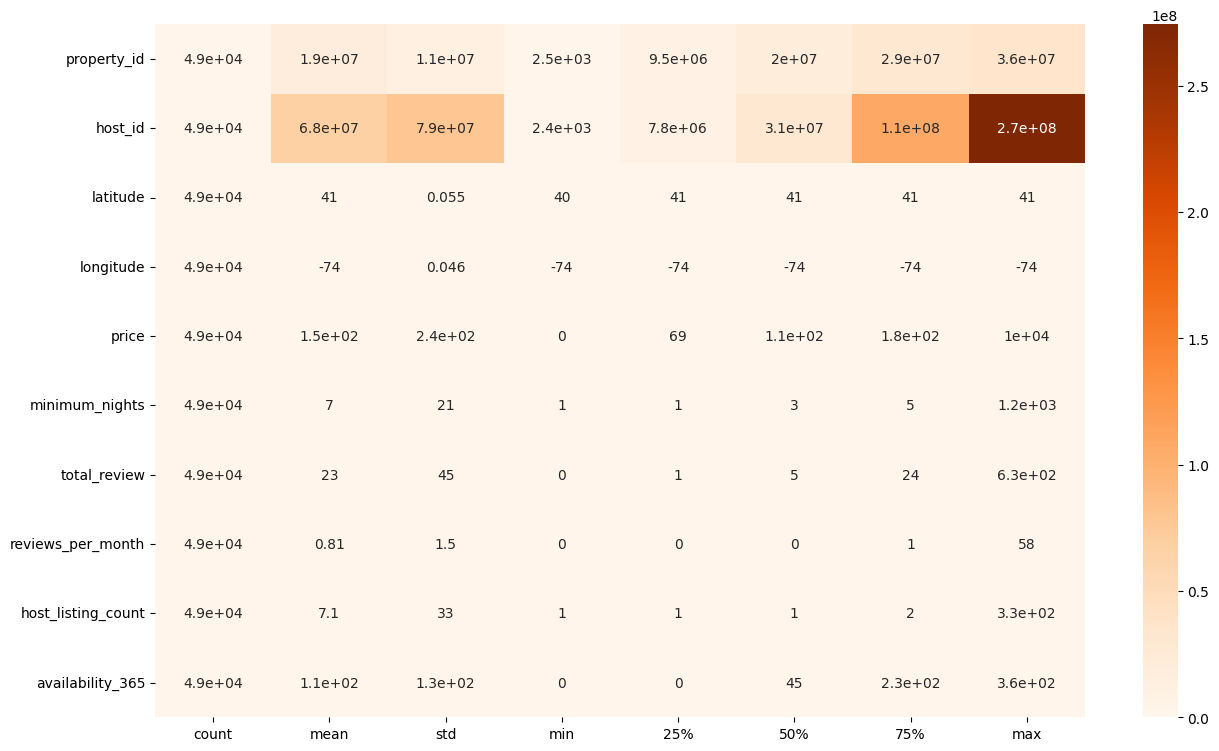

In [ ]:
# plt.figure(figsize = (15, 9))
# sns.heatmap(df.describe().T, cmap = 'Oranges', annot = True)

In [ ]:
df.describe(include = "O").T

,count,unique,top,freq
property_name,48895,47906,Hillside Hotel,18
host_name,48895,11453,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409


**Insights**

1. **The AirBnB that is the most popular is Hillside Hotel**

2. **The most busiest host is Michael**

3. **The most favourite room type is Entire Home/apt**

4. **The most popular neighbourhood is Manhattan**

5. **The most popular be neighbourhood_group is Williamburg**

<hr>

# **Step 7 - Exploratory Data Analysis (EDA)**

**Update 1: Outliers**

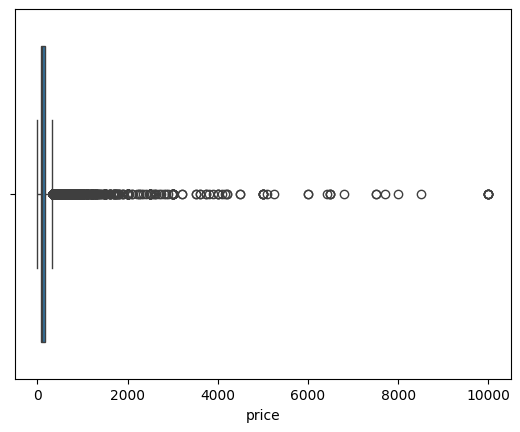

In [ ]:
# let's assume the col is price
sns.boxplot(x= df['price'])
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.box(df, y = 'price')
fig.show()

In [ ]:
# eliminating the outliers

def iqr_sol(dfCol):
  q1 = np.percentile(dfCol, 25)
  q3 = np.percentile(dfCol, 75)

  IQR = q3 - q1

  LL = q1 - (1.5*IQR)
  UL = q3 + (1.5*IQR)

  return UL, LL

In [ ]:
UW, LW = iqr_sol(df['price'])
UW, LW

(np.float64(334.0), np.float64(-90.0))

In [ ]:
df = df[(df.price>=LW) & (df.price<=UW)]
df

,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_review,reviews_per_month,host_listing_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2


In [ ]:
fig = px.box(df, y ='price')
fig.show()

# **Visualization to support our assumptions**

Text(0.5, 1.0, 'Distribution of prices in the AirBnB')

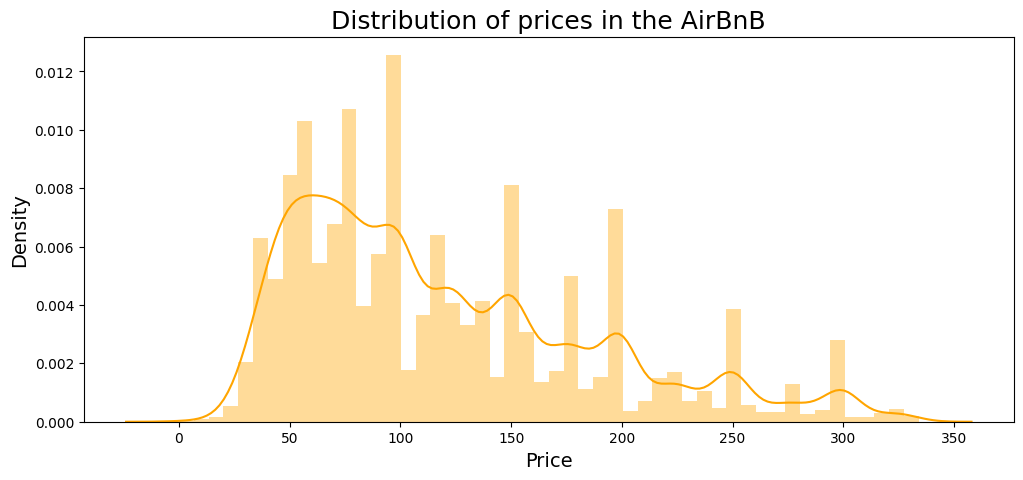

In [ ]:
# using histogram we are going to carry out the distribution of data
# it will give us the overview of the data for population if they are
# densely populated or not
# plt.style.use('dark_background')
plt.figure(figsize=(12, 5))
sns.distplot(df['price'], color = 'orange')
plt.xlabel('Price', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution of prices in the AirBnB', fontsize = 18)

In [ ]:
fig = px.histogram(df,
                   x= 'price',
                   nbins= 10,
                   title = 'Distribution of prices in the AirBnB',
                   labels = {'price':'Price of the AirBnB', 'count':'Density of the points'})
fig.update_layout(xaxis_title = 'Price', yaxis_title = 'Density',bargap = 0.1)
fig.show()

**Assumptions**
1. Median in range of 100 - 150
2. Mean in range of 100 - 130

In [ ]:
df.price.mean()

np.float64(119.97031988328288)

In [ ]:
df.price.median()

100.0

# **Most busiest Neighbourhood**

In [ ]:
fig = px.histogram(df,
                   x = 'neighbourhood_group',
                   title = 'Neighbourhoods available in NYC',
                   labels = {'neighbourhood_group': 'Neighbourhood Group', 'count':'Total Number of listing'})
fig.update_layout(xaxis_title = 'Neighbourhood Group', yaxis_title = 'Total Listing')
fig.show()

**Assumptions: Manhattan is the most popular area for airbnb, following the Brooklyn, and then queens**

# **Price Analysis**

Text(0.5, 1.0, 'Avg Price vs Neighbourhood')

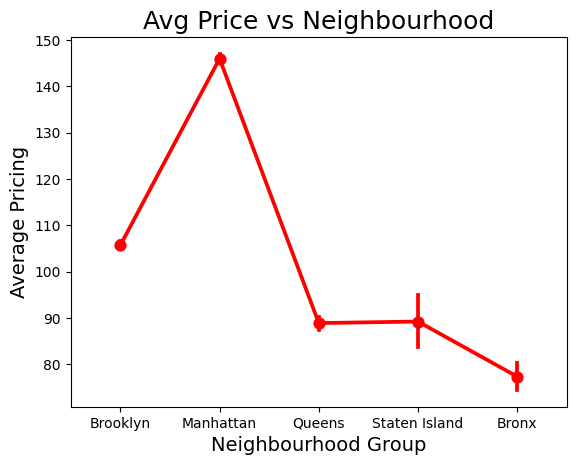

In [ ]:
# neighbourhood_group column being used to calculate the avg pricing in each of these neighborhoods by using point plot
# we use mean over here to calculate the avg pricing
# point plot to do so

from statistics import mean

sns.pointplot(x = 'neighbourhood_group', y = 'price', data = df, estimator = np.mean,color = 'red')

plt.xlabel('Neighbourhood Group', fontsize = 14)
plt.ylabel('Average Pricing', fontsize = 14)

plt.title('Avg Price vs Neighbourhood', fontsize = 18)

**Assumptions: Manhattan is the most expensive area, as the average pricing in Manhattan is in between 140 - 150, followed by Brooklyn and Staten Island**